In [1]:
import sys
import rootpath
sys.path.append(rootpath.detect())

import wfg
import numpy as np
import matplotlib.pyplot as plt
from experiments.igd_refpoints.igd_utilities import *
from testsuite.utilities import Pareto_split 
import matplotlib.patches as patches
from scipy.spatial import KDTree

func = wfg.WFG2

### wfg2_2obj_10dim

In [2]:
try:
    with open('data/wfg2_2obj_10dim_refpoints', 'rb') as infile:
        ya = np.load(infile)
    wfg2_2obj_10dim_loaded = True
    print("2D data: loaded")
except FileNotFoundError:
    wfg2_2obj_10dim_loaded = False
    print("2D data: not found")

2D data: loaded


In [3]:
M = 2                                   # Number of objectives
kfactor = 1
lfactor = 1
k = kfactor*(M-1)   # position related params
l = lfactor*2           # distance related params


n_dim = k+l
n_obj = M

N = 10000
y0 = np.zeros((N, n_obj))
x0 = np.zeros((N, n_dim))
for n in range(N):
    z = wfg.random_soln(k, l, func.__name__)
    y0[n,:] = func(z, k, M)
    x0[n,:] = z


# sample with k and l factors
kfactor = 4
lfactor = 3
k = kfactor*(M-1)   # position related params
l = lfactor*2       # distance related params

n_dim = k+l
y = np.zeros((N, n_obj))
x = np.zeros((N, n_dim))
for n in range(N):
    z = wfg.random_soln(k, l, func.__name__)
    y[n,:] = func(z, k, M)
    x[n,:] = z

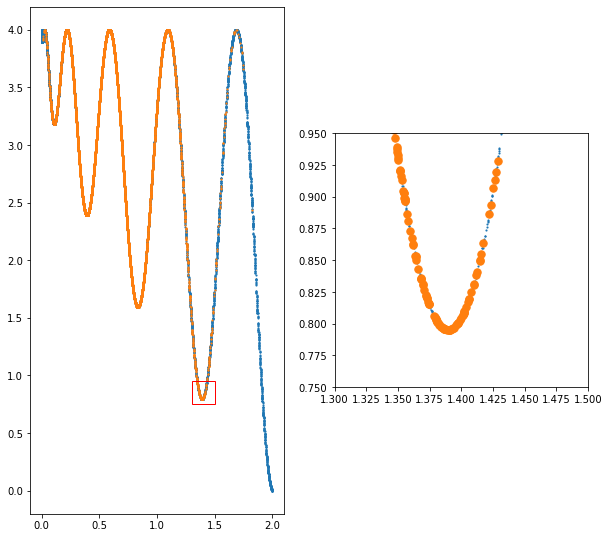

In [4]:
fig = plt.figure(figsize = [10, 10])
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)
ax0.scatter(*y0.T, c="C0", marker=".", s=5)
ax0.scatter(*y.T, c="C1", marker=".", s=5)
ax0.set_aspect('equal')
rect = patches.Rectangle((1.3, 0.75),0.2,0.2,linewidth=1,edgecolor='r',facecolor='none')
ax0.add_patch(rect)

ax1.set_xlim([1.3, 1.5])
ax1.set_ylim([0.75, 0.95])
ax1.scatter(*y0.T, c="C0", marker=".", s=5)
ax1.scatter(*y.T, c="C1", s=55)
ax1.set_aspect('equal')
    
# if not wfg2_2obj_10dim_loaded:
#     offset = -0.224
#     ax0.scatter(*(y0+[offset, offset]).T, s=2, c="C3")
#     ax1.scatter(*(y0+[offset, offset]).T, s=2, c="C3")
# else:
#     ax0.scatter(*ya.T, s=2, c="C3")
#     ax1.scatter(*ya.T, s=2, c="C3")

In [5]:
pi, di = Pareto_split(y0, return_indices=True)

In [6]:
if not wfg2_2obj_10dim_loaded:
    ya = attainment_sample(y0[pi], 5000)

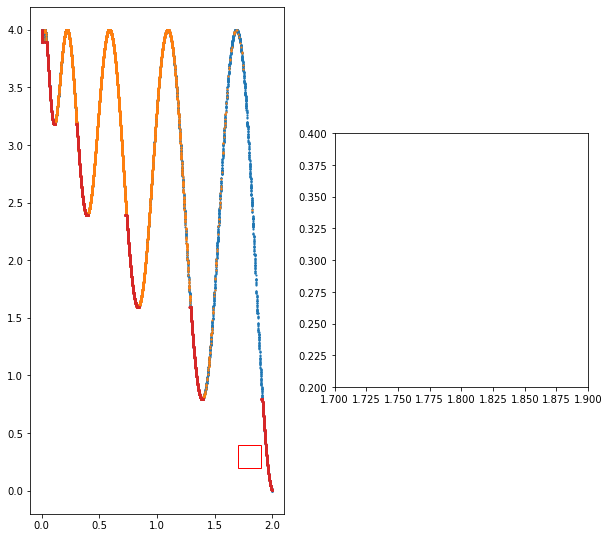

In [7]:
fig = plt.figure(figsize = [10, 10])
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)
ax0.scatter(*y0.T, c="C0", marker=".", s=5)
ax0.scatter(*y.T, c="C1", marker=".", s=5)
ax0.scatter(*ya.T, s=2, c="C3")
ax0.set_aspect('equal')
rect = patches.Rectangle((1.7, 0.2),0.2,0.2,linewidth=1,edgecolor='r',facecolor='none')
ax0.add_patch(rect)

ax1.set_xlim([1.7, 1.9])
ax1.set_ylim([0.2, 0.4])
ax1.scatter(*y0.T, c="C0", marker=".", s=5)
ax1.scatter(*y.T, c="C1", s=55)
ax1.scatter(*ya.T, s=2, c="C3")
ax1.set_aspect('equal')

In [8]:
tree0 = KDTree(y0[pi])
nn0 = tree0.query(ya)[0]

tree1 = KDTree(ya)
nn1 = tree1.query(y0[pi])[0]

In [9]:
thresh_plot_0 = np.zeros(200)
thresh_plot_1 = np.zeros(200)
for i, j in tqdm(enumerate(np.linspace(0.01, 0.5, 200))):
    thresh_plot_0[i] = sum(nn0<j)
    thresh_plot_1[i] = sum(nn1<j)

200it [00:02, 68.93it/s]


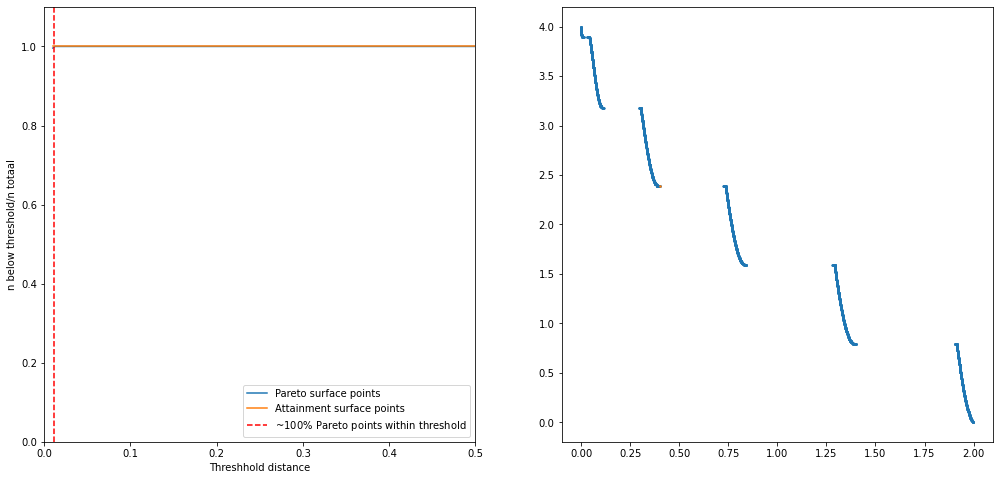

In [10]:
thresh = 0.011 
fig = plt.figure(figsize=[17, 8])
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

yf_3 = ya[nn0<thresh]

ax0.plot(np.linspace(0.01, 0.5, 200), np.array(thresh_plot_0)/len(nn0), label="Pareto surface points")
ax0.plot(np.linspace(0.01, 0.5, 200), np.array(thresh_plot_1)/len(nn1), label="Attainment surface points")
ax0.axvline(thresh, linestyle="--", c="r", label=r"~$100\%$ Pareto points within threshold")
ax0.set_xlabel("Threshhold distance")
ax0.set_ylabel("n below threshold/n totaal")
ax0.set_xlim([0, 0.5])
ax0.set_ylim([0, 1.1])
ax0.legend()

ax1.scatter(*yf_3.T, s=2, c="C0", label="nn distance<threshold")
ax1.scatter(*ya[nn0>thresh, :3].T, s=2, c="C1", label="nn distance>threshold")

In [11]:
if not wfg2_2obj_10dim_loaded: 
    with open('data/wfg2_2obj_10dim_refpoints', 'wb') as outfile:
        np.save(outfile, yf_3)
    print("2D data: saved")

### wfg1_2obj_3dim

In [12]:
try:
    with open('data/wfg2_2obj_3dim_refpoints', 'rb') as infile:
        ya = np.load(infile)
    wfg2_2obj_3dim_loaded = True
    print("Data: loaded")
except FileNotFoundError:
    wfg2_2obj_3dim_loaded = False
    print("Data: not found")

Data: loaded


In [13]:
# sample with k and l factors
kfactor = 2
lfactor = 2
k = kfactor*(M-1)   # position related params
l = lfactor*2       # distance related params

n_dim = k+l
y = np.zeros((N, n_obj))
x = np.zeros((N, n_dim))
for n in range(N):
    z = wfg.random_soln(k, l, func.__name__)
    y[n,:] = func(z, k, M)
    x[n,:] = z

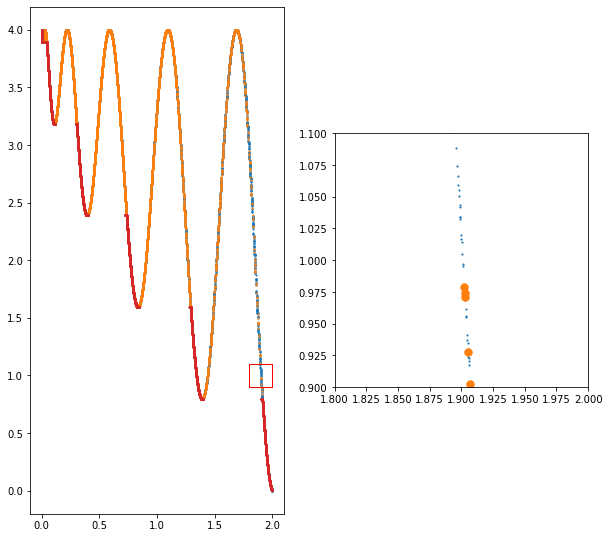

In [14]:
fig = plt.figure(figsize = [10, 10])
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)
ax0.scatter(*y0.T, c="C0", marker=".", s=5)
ax0.scatter(*y.T, c="C1", marker=".", s=5)
ax0.set_aspect('equal')
rect = patches.Rectangle((1.8, 0.9),0.2,0.2,linewidth=1,edgecolor='r',facecolor='none')
ax0.add_patch(rect)

ax1.set_xlim([1.8, 2.0])
ax1.set_ylim([0.9, 1.1])
ax1.scatter(*y0.T, c="C0", marker=".", s=5)
ax1.scatter(*y.T, c="C1", s=55)
ax1.set_aspect('equal')
    
if not wfg2_2obj_3dim_loaded:
    offset = 0.0
    ax0.scatter(*(y0+[offset, offset]).T, s=2, c="C3")
    ax1.scatter(*(y0+[offset, offset]).T, s=2, c="C3")
else:
    ax0.scatter(*ya.T, s=2, c="C3")
    ax1.scatter(*ya.T, s=2, c="C3")

In [15]:
if not wfg2_2obj_3dim_loaded: 
    with open('data/wfg2_2obj_3dim_refpoints', 'wb') as outfile:
        np.save(outfile,  yf_3)
    print("2D data: saved")

### wfg2_3obj_10dim

In [30]:
try:
    with open('data/wfg2_3obj_10dim_refpoints', 'rb') as infile:
        yf_3 = np.load(infile)
    wfg2_3obj_10dim_loaded = True
    print("Data: loaded")
except FileNotFoundError:
    wfg2_3obj_10dim_loaded = False
    print("Data: not found")

Data: loaded


In [17]:
M = 3  # Number of objectives
kfactor = 1
lfactor = 1
k = kfactor*(M-1)   # position related params
l = lfactor*2   

n_dim = k+l
n_obj = M

N = 50000
y0 = np.zeros((N, n_obj))
x0 = np.zeros((N, n_dim))
for n in range(N):
    z = wfg.random_soln(k, l, func.__name__)
    y0[n,:] = func(z, k, M)
    x0[n,:] = z


# sample with k and l factors
kfactor = 3
lfactor = 2
k = kfactor*(M-1)   # position related params
l = lfactor*2       # distance related params

n_dim = k+l
y = np.zeros((N, n_obj))
x = np.zeros((N, n_dim))
for n in range(N):
    z = wfg.random_soln(k, l, func.__name__)
    y[n,:] = func(z, k, M)
    x[n,:] = z

In [18]:
diff = y0.min(axis=0) 
diff

array([7.28111150e-11, 2.01709434e-11, 6.91281764e-05])

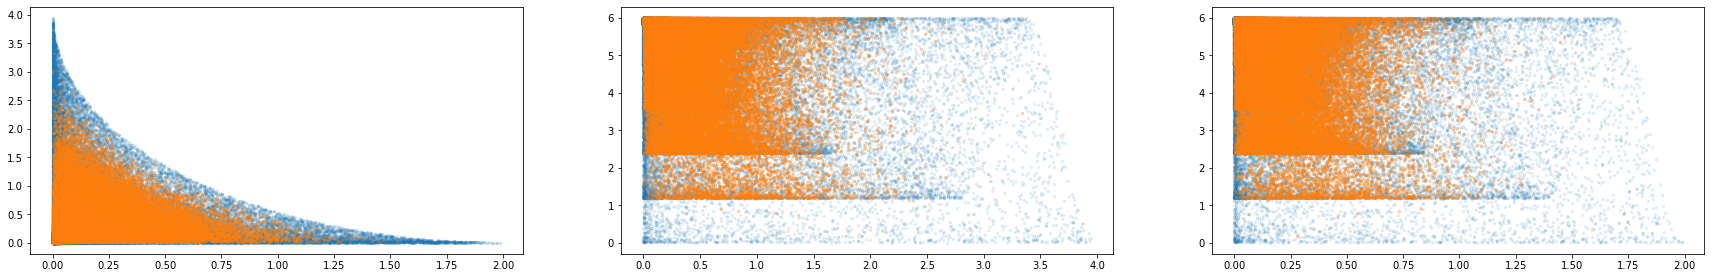

In [19]:
fig = plt.figure(figsize=[30, 10])
ax0 = fig.add_subplot(231)
ax1 = fig.add_subplot(232)
ax2 = fig.add_subplot(233)


ax0.scatter(*(y0-diff)[:, :2].T, c="C0", s=5, alpha=0.1)
ax0.scatter(*y[:, :2].T, c="C1", s=5, alpha=0.3)

ax1.scatter(*(y0-diff)[:, 1:].T, c="C0", s=5, alpha=0.1)
ax1.scatter(*y[:, 1:].T, c="C1", s=5, alpha=0.3)

ax2.scatter(*(y0-diff)[:, [0,2]].T, c="C0", s=5, alpha=0.1)
ax2.scatter(*y[:, [0,2]].T, c="C1", s=5, alpha=0.3)

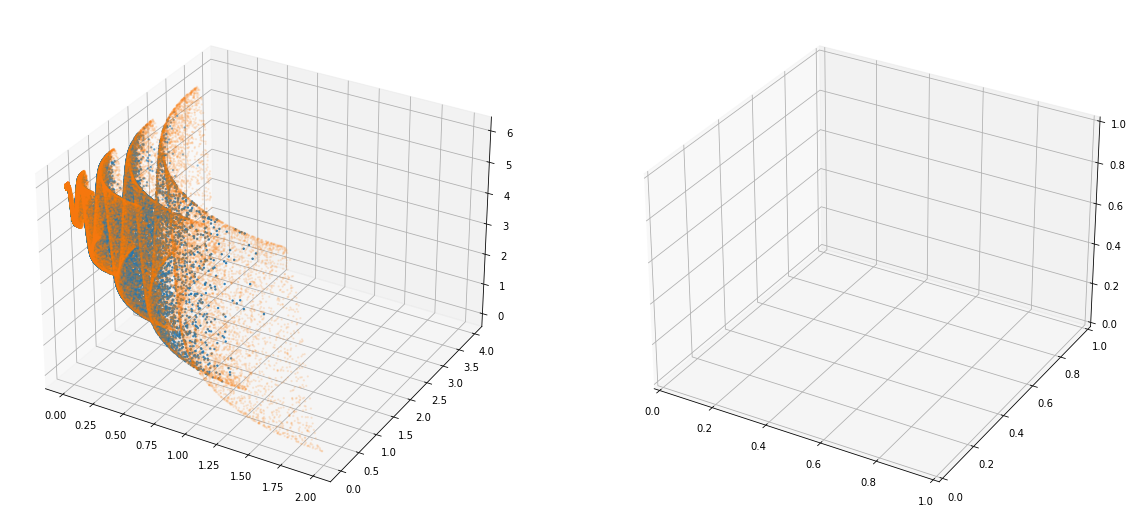

In [20]:
fig = plt.figure(figsize=[20, 10])
ax0 = fig.add_subplot(121, projection='3d') 
ax1 = fig.add_subplot(122, projection='3d') 


ax0.scatter(*(y0-diff).T, c="C1", s=2, alpha=.1)
ax0.scatter(*y.T, c="C0", s=2)

In [22]:
pi, di = Pareto_split(y0, return_indices=True)

In [23]:
if not wfg2_3obj_10dim_loaded:
    ya = attainment_sample(y0[pi], 10000)

In [94]:
tree0 = KDTree((y0-diff)[pi])
nn0 = tree0.query(ya)[0]

tree1 = KDTree(ya)
nn1 = tree1.query((y0-diff)[pi])[0]

In [95]:
thresh_plot_0 = np.zeros(200)
thresh_plot_1 = np.zeros(200)
for i, j in tqdm(enumerate(np.linspace(0.01, 0.5, 200))):
    thresh_plot_0[i] = sum(nn0<j)
    thresh_plot_1[i] = sum(nn1<j)

200it [00:12, 15.49it/s]


In [96]:
thresh = 0.06
      
fig = plt.figure(figsize=[17, 8])
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122, projection="3d")

yf_3 = ya[nn0<thresh]

ax0.plot(np.linspace(0.01, 0.5, 200), np.array(thresh_plot_0)/len(nn0), label="Pareto surface points")
ax0.plot(np.linspace(0.01, 0.5, 200), np.array(thresh_plot_1)/len(nn1), label="Attainment surface points")
ax0.axvline(thresh, linestyle="--", c="r", label=r"~$100\%$ Pareto points within threshold")
ax0.set_xlabel("Threshhold distance")
ax0.set_ylabel("n below threshold/n totaal")
ax0.set_xlim([0, 0.5])
ax0.set_ylim([0, 1.1])
ax0.legend()

ax1.scatter(*yf_3.T, s=2, c="C0", label="nn distance<threshold")
ax1.scatter(*ya[nn0>thresh, :3].T, s=2, c="C1", label="nn distance>threshold")

In [25]:
%matplotlib qt

In [26]:
fig = plt.figure(figsize=[17, 8])
ax0 = fig.add_subplot(121, projection="3d")
ax1 = fig.add_subplot(122, projection="3d")

ax0.scatter(*yf_3.T, s=2, c="C0")
ax1.scatter(*y.T, s=2, c="C1")

In [98]:
if not wfg2_3obj_10dim_loaded: 
    with open('data/wfg2_3obj_10dim_refpoints', 'wb') as outfile:
        np.save(outfile, yf_3)
    print("2D data: saved")

2D data: saved


### wfg2_3obj_6dim

In [27]:
try:
    with open('data/wfg2_3obj_6dim_refpoints', 'rb') as infile:
        yf_3 = np.load(infile)
    wfg2_3obj_6dim_loaded = True
    print("Data: loaded")
except FileNotFoundError:
    wfg2_3obj_6dim_loaded = False
    print("Data: not found")

Data: not found


In [31]:
## SAME AS 10D
if not wfg2_3obj_6dim_loaded: 
    with open('data/wfg2_3obj_6dim_refpoints', 'wb') as outfile:
        np.save(outfile, yf_3)
    print("2D data: saved")
else:
    fig = plt.figure()
    ax = fig.gca(projection="3d")
    ax.scatter(*ya.T, s=5)

2D data: saved


### wfg2_4obj_10dim

In [2]:
try:
    with open('data/wfg2_4obj_10dim_refpoints', 'rb') as infile:
        ya = np.load(infile)
    wfg2_4obj_10dim_loaded = True
    print("Data: loaded")
except FileNotFoundError:
    wfg2_4obj_10dim_loaded = False
    print("Data: not found")

Data: not found


In [3]:
M = 4  # Number of objectives
kfactor = 1
lfactor = 1
k = kfactor*(M-1)   # position related params
l = lfactor*2   

n_dim = k+l
n_obj = M

N = 100000
y0 = np.zeros((N, n_obj))
x0 = np.zeros((N, n_dim))
for n in range(N):
    z = wfg.random_soln(k, l, func.__name__)
    y0[n,:] = func(z, k, M)
    x0[n,:] = z


# sample with k and l factors
kfactor = 3
lfactor = 2
k = kfactor*(M-1)   # position related params
l = lfactor*2       # distance related params

n_dim = k+l
y = np.zeros((N, n_obj))
x = np.zeros((N, n_dim))
for n in range(N):
    z = wfg.random_soln(k, l, func.__name__)
    y[n,:] = func(z, k, M)
    x[n,:] = z

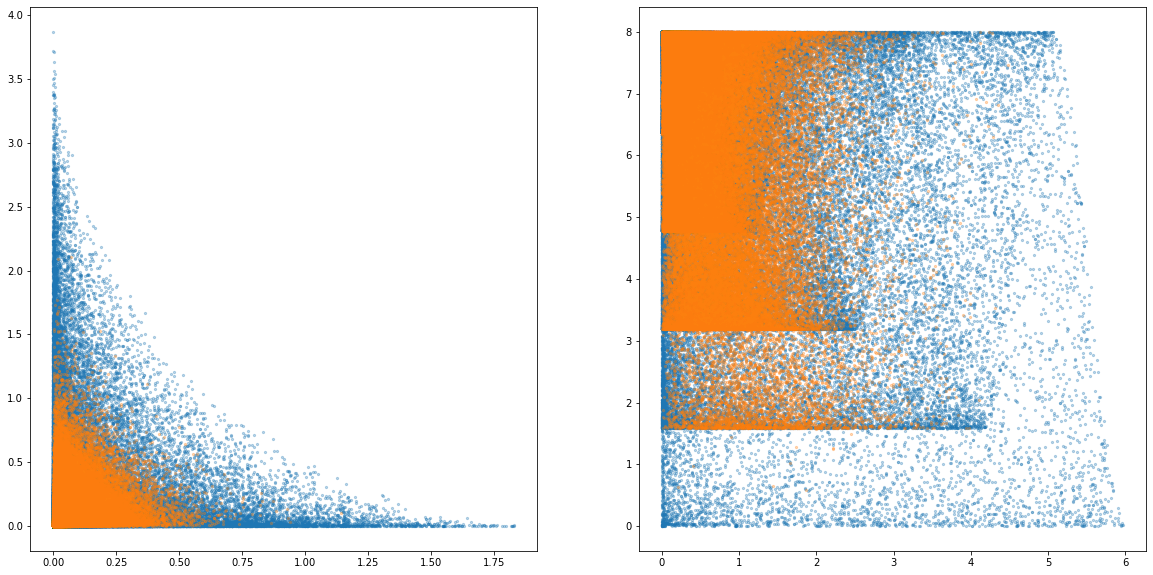

In [4]:
fig = plt.figure(figsize=[20, 10])
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

ax0.scatter(*(y0[:, :2]+y.min(axis=0)[:2]).T, c="C0", s=5, alpha=0.3)
ax0.scatter(*y[:, :2].T, c="C1", s=5, alpha=0.3)

ax1.scatter(*(y0[:, 2:]+[y.min(axis=0)[2], (y.max(axis=0)[3]-y0.max(axis=0)[3])]).T, c="C0", s=5, alpha=0.3)
ax1.scatter(*y[:, 2:].T, c="C1", s=5, alpha=0.3)

In [5]:
## No adjustment required

In [6]:
if not wfg2_4obj_10dim_loaded:
#     ya = attainment_sample(y0+adjustment, 25000)
    ya = attainment_sample(y0, 200000)

100%|██████████| 200000/200000 [4:07:42<00:00, 13.46it/s]  


In [7]:
tree0 = KDTree(y)
nn0 = tree0.query(ya)[0]

tree1 = KDTree(ya)
nn1 = tree1.query(y)[0]

In [8]:
thresh_plot_0 = np.zeros(200)
thresh_plot_1 = np.zeros(200)
for i, j in tqdm(enumerate(np.linspace(0.01, 0.5, 200))):
    thresh_plot_0[i] = sum(nn0<j)
    thresh_plot_1[i] = sum(nn1<j)

200it [02:36,  1.28it/s]


/home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/mpl_toolkits/mplot3d/art3d.py:838: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/mpl_toolkits/mplot3d/art3d.py:840: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


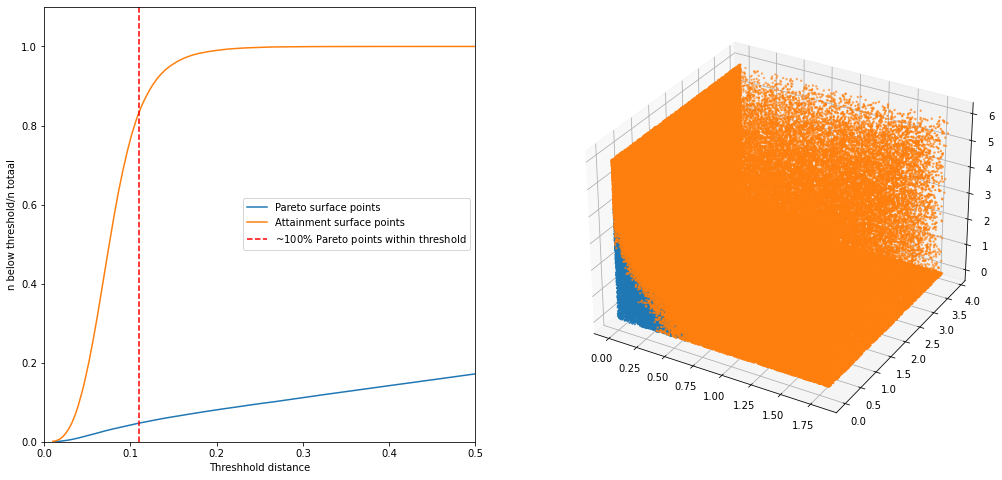

In [17]:
thresh = 0.11
      
fig = plt.figure(figsize=[17, 8])
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122, projection="3d")

yf_3 = ya[nn0<thresh]

ax0.plot(np.linspace(0.01, 0.5, 200), np.array(thresh_plot_0)/len(nn0), label="Pareto surface points")
ax0.plot(np.linspace(0.01, 0.5, 200), np.array(thresh_plot_1)/len(nn1), label="Attainment surface points")
ax0.axvline(thresh, linestyle="--", c="r", label=r"~$100\%$ Pareto points within threshold")
ax0.set_xlabel("Threshhold distance")
ax0.set_ylabel("n below threshold/n totaal")
ax0.set_xlim([0, 0.5])
ax0.set_ylim([0, 1.1])
ax0.legend()

ax1.scatter(*yf_3.T, s=2, c="C0", label="nn distance<threshold")
ax1.scatter(*ya[nn0>thresh, :3].T, s=2, c="C1", label="nn distance>threshold")

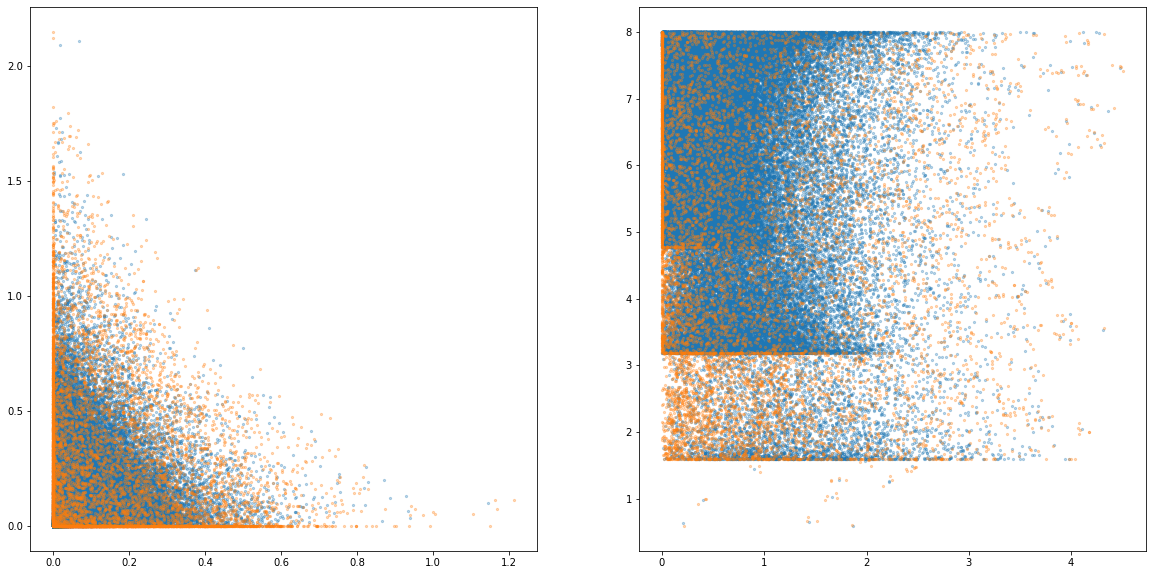

In [18]:
fig = plt.figure(figsize=[20, 10])
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

ax0.scatter(*y[:,:2].T, c="C0", s=5, alpha=0.3)
ax0.scatter(*yf_3[:,:2].T, c="C1", s=5, alpha=0.3)

ax1.scatter(*y[:,2:].T, c="C0", s=5, alpha=0.3)
ax1.scatter(*yf_3[:,2:].T, c="C1", s=5, alpha=0.3)

In [21]:
%matplotlib qt

In [22]:
fig = plt.figure(figsize=[20, 10])
ax0 = fig.add_subplot(121, projection='3d')
ax1 = fig.add_subplot(122, projection='3d')

ax0.scatter(*y[:,:3].T, c="C0", s=5, alpha=0.3)
ax0.scatter(*yf_3[:,:3].T, c="C1", s=5, alpha=0.3)

ax1.scatter(*y[:,1:].T, c="C0", s=5, alpha=0.3)
ax1.scatter(*yf_3[:,1:].T, c="C1", s=5, alpha=0.3)

In [23]:
if not wfg2_4obj_10dim_loaded: 
    with open('data/wfg2_4obj_10dim_refpoints', 'wb') as outfile:
        np.save(outfile, yf_3)
    print("Data: saved")

Data: saved
